# Annual releases of PDB structures

Conny Yu, 03/2024<br><br>
Source code: Patrick Kunzmann / Biotite <br>
Modified to show line plots.<br>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import biotite
import biotite.database.rcsb as rcsb 
from datetime import datetime, time

years = np.arange(1990, datetime.today().year + 1)
xray_count = np.zeros(len(years), dtype=int)
nmr_count = np.zeros(len(years), dtype=int)
em_count = np.zeros(len(years), dtype=int)
tot_count = np.zeros(len(years), dtype=int)

# For each year fetch the list of released PDB IDs
# and count the number
for i, year in enumerate(years):
    # A query that comprises one year
    date_query = rcsb.FieldQuery(
        "rcsb_accession_info.initial_release_date",
        range_closed = (
            datetime.combine(datetime(year,  1,  1), time.min),
            datetime.combine(datetime(year, 12, 31), time.max)
        )
    )
    xray_query = rcsb.FieldQuery(
        "exptl.method", exact_match="X-RAY DIFFRACTION"
    )
    nmr_query = rcsb.FieldQuery(
        "exptl.method", exact_match="SOLUTION NMR"
    )
    em_query = rcsb.FieldQuery(
        "exptl.method", exact_match="ELECTRON MICROSCOPY"
    )
    # Get the amount of structures, that were released in that year
    # AND were elucidated with the respective method
    xray_count[i], nmr_count[i], em_count[i] = [
        rcsb.count(date_query & method_query)
        for method_query in [xray_query, nmr_query, em_query]
    ]
    # Get the total amount of structures released in that year
    tot_count[i] = rcsb.count(date_query)


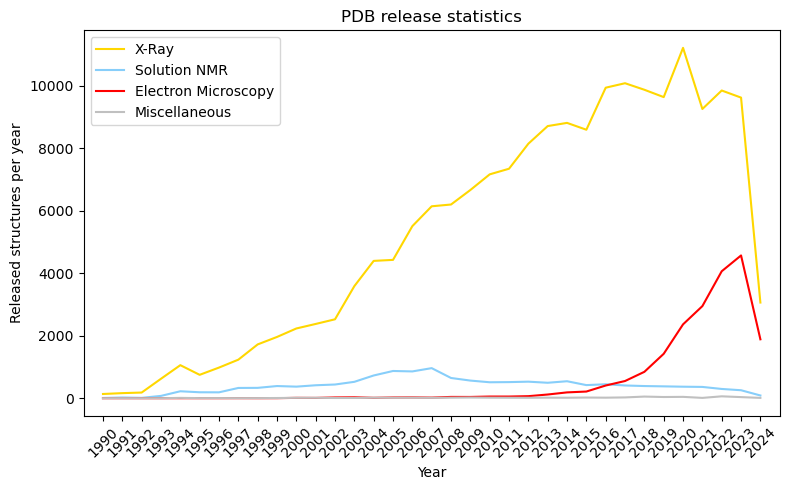

In [24]:
fig, ax = plt.subplots(figsize=(8.0, 5.0))
ax.set_title("PDB release statistics")
ax.set_xlim(years[0]-1, years[-1]+1)
ax.set_xticks(years)
ax.set_xticklabels([str(y) for y in years], rotation=45)
ax.set_xlabel("Year")
ax.set_ylabel("Released structures per year")
ax.plot(years, xray_count, color="gold", label="X-Ray")
ax.plot(years, nmr_count, color="lightskyblue", label="Solution NMR")
ax.plot(years, em_count, color="red", label="Electron Microscopy")
ax.plot(years, tot_count - xray_count - nmr_count - em_count, color="silver", label="Miscellaneous")
ax.legend(loc="upper left")
fig.tight_layout()

plt.show()
fig.savefig('pdb_stat.png', dpi=fig.dpi)